# Tarefa - Álgebra Linear M26 - Tarefa1

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

Para obter a média e a diferença das notas p1 e p2 usando uma transformação linear, usamos a multiplicação matricial:

$$\begin{bmatrix} média \\ diferença \end{bmatrix} = \begin{bmatrix} 0.5 & 0.5 \\ 1 & -1 \end{bmatrix} \cdot \begin{bmatrix} p_1 \\ p_2 \end{bmatrix}$$

Essa matriz calcula:

a média, combinando igualmente p1 e p2

a diferença, mostrando o quanto as duas notas variam entre si

In [10]:
import pandas as pd

# Assumindo que o DataFrame 'df' já foi criado e contém as colunas 'p1' e 'p2'
# Se o df não existir, você precisará gerá-lo primeiro, como feito anteriormente.

corr_p1_p2 = df['p1'].corr(df['p2'])

print(f"A correlação entre p1 e p2 é: {corr_p1_p2}")

A correlação entre p1 e p2 é: 0.8897455249351818


b) Correlação entre p1 e p2

Como p2 foi construída a partir de p1 com um ruído pequeno, as duas ficam fortemente correlacionadas. O gráfico mostra claramente os pontos próximos da diagonal.

Também configuramos o gráfico com:

aspect ratio igual (ax.set_aspect('equal'))
→ garante que 1 unidade em p1 tenha o mesmo tamanho visual que 1 unidade em p2

limites fixos (0 a 11)
→ melhora a comparação e garante que os pontos não se “espremam” no gráfico

Isso ajuda a visualizar a dependência linear entre as notas.

c) Correlação entre média e diferença

Após aplicar a transformação linear (média e diferença), a correlação praticamente desaparece, ficando perto de zero.

Isso ocorre porque:

a média captura apenas o nível geral das notas

a diferença captura apenas o desequilíbrio entre p1 e p2

Como são informações distintas, não variam juntas.

d) Comentário geral sobre as correlações

Antes da transformação: p1 e p2 têm correlação alta e positiva, pois uma depende diretamente da outra.

Depois da transformação: média e diferença têm correlação reduzida (quase zero).

Isso demonstra como transformações lineares podem reduzir correlações, extraindo informações independentes das variáveis originais.
É uma técnica comum em estatística e machine learning, semelhante a operações feitas em PCA.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

### Fórmula de Soma e Diferença via Multiplicação Matricial

Para obter a **soma** (p1 + p2) e a **diferença** (p1 - p2) das notas, podemos usar uma transformação linear por meio da seguinte multiplicação matricial:

$$\begin{bmatrix} soma \\ diferença \end{bmatrix} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \cdot \begin{bmatrix} p_1 \\ p_2 \end{bmatrix}$$

Essa matriz de transformação 2x2 opera da seguinte forma:

- **Primeira linha da matriz** `[1, 1]`: Esta linha é responsável por calcular a **soma** das notas. Quando multiplicada pelo vetor `[p1, p2]` (transposto), resulta em `1 * p1 + 1 * p2`, que é simplesmente `p1 + p2`.

- **Segunda linha da matriz** `[1, -1]`: Esta linha é responsável por calcular a **diferença** entre as notas. Quando multiplicada pelo vetor `[p1, p2]` (transposto), resulta em `1 * p1 + (-1) * p2`, que é `p1 - p2`.

Essa abordagem permite calcular de forma eficiente as novas variáveis (soma e diferença) a partir das originais (p1 e p2) usando operações matriciais.

In [15]:
import numpy as np
import pandas as pd

# Certifique-se de que o DataFrame 'df' com 'p1' e 'p2' esteja disponível.
# Se esta célula for executada independentemente, você pode precisar gerar 'df' primeiro.

# 1a) Transformação linear: média e diferença
A = np.array([[0.5, 0.5],
              [1, -1]])   # matriz de transformação

X = df[['p1', 'p2']].values.T  # matriz 2xN

media_diff = A @ X
df['media'] = media_diff[0]
df['diferenca'] = media_diff[1]

print("DataFrame com as colunas 'media' e 'diferenca' adicionadas (primeiras 5 linhas):")
print(df[['p1', 'p2', 'media', 'diferenca']].head())

DataFrame com as colunas 'media' e 'diferenca' adicionadas (primeiras 5 linhas):
         p1        p2     media  diferenca
0  6.964692  8.230628  7.597660  -1.265936
1  2.861393  1.994653  2.428023   0.866740
2  2.268515  1.589628  1.929071   0.678886
3  5.513148  5.418439  5.465793   0.094709
4  7.194690  8.686079  7.940385  -1.491390


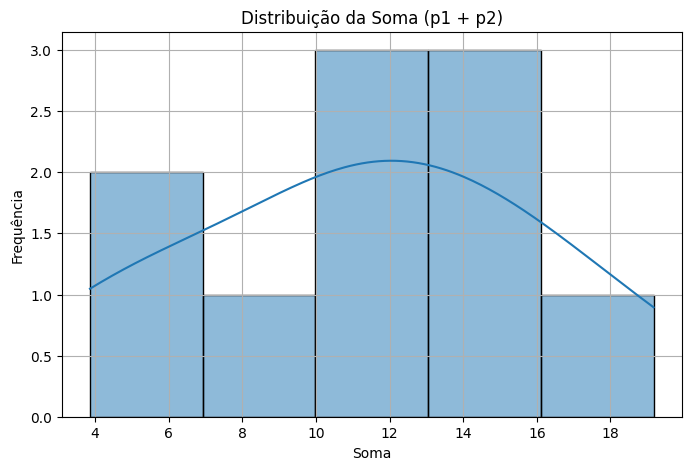

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'soma'
plt.figure(figsize=(8, 5))
sns.histplot(df['soma'], kde=True, bins=5)
plt.title('Distribuição da Soma (p1 + p2)')
plt.xlabel('Soma')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

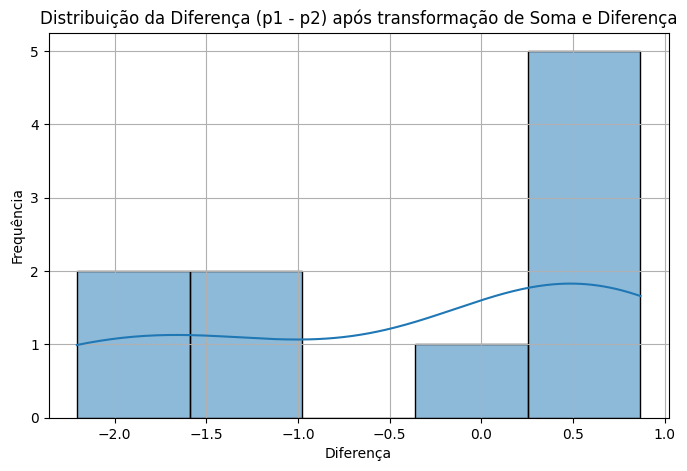

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'dif_soma'
plt.figure(figsize=(8, 5))
sns.histplot(df['dif_soma'], kde=True, bins=5)
plt.title('Distribuição da Diferença (p1 - p2) após transformação de Soma e Diferença')
plt.xlabel('Diferença')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

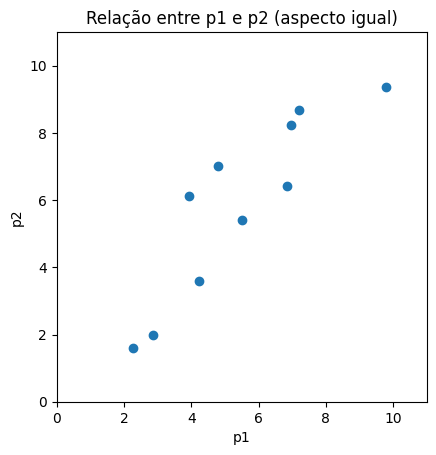

Correlação p1 x p2 = 0.8897455249351818
Correlação média x diferença = -0.3447376782246304


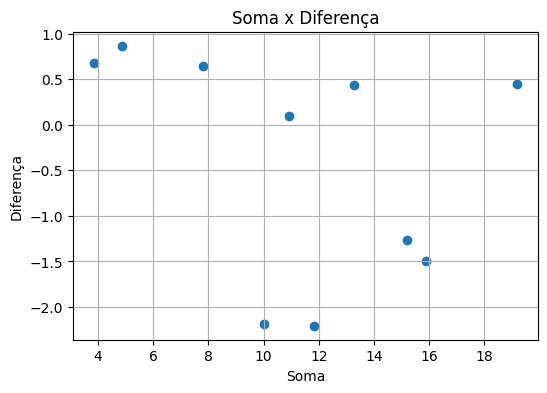

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 0) Gráfico inicial com limites e aspecto igual
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', 'box')
ax.set(xlim=(0, 11), ylim=(0, 11))

# Gerando os dados apenas UMA VEZ
np.random.seed(123)

p1 = np.random.random(10) * 10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0, 1, 10)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# Plot do gráfico inicial
plt.scatter(x=df.p1, y=df.p2)
plt.xlabel("p1")
plt.ylabel("p2")
plt.title("Relação entre p1 e p2 (aspecto igual)")
plt.show()


# 1a) Transformação linear: média e diferença
A = np.array([[0.5, 0.5],
              [1, -1]])   # matriz de transformação

X = df[['p1', 'p2']].values.T  # matriz 2xN

media_diff = A @ X
df['media'] = media_diff[0]
df['diferenca'] = media_diff[1]


# 1b) Correlação entre p1 e p2
corr_p1_p2 = df['p1'].corr(df['p2'])


# 1c) Correlação entre média e diferença
corr_media_diff = df['media'].corr(df['diferenca'])

print("Correlação p1 x p2 =", corr_p1_p2)
print("Correlação média x diferença =", corr_media_diff)


# 2) Transformação com soma e diferença
B = np.array([[1, 1],
              [1, -1]])  # nova matriz

soma_diff = B @ X
df['soma'] = soma_diff[0]
df['dif_soma'] = soma_diff[1]

# Gráfico soma x diferença
plt.figure(figsize=(6,4))
plt.scatter(df['soma'], df['dif_soma'])
plt.xlabel("Soma")
plt.ylabel("Diferença")
plt.title("Soma x Diferença")
plt.grid(True)
plt.show()

### Análise do Gráfico de Soma vs. Diferença

Ao observar o gráfico de dispersão da 'Soma' (p1 + p2) versus a 'Diferença' (p1 - p2) após a transformação:

- **Distribuição:** Os pontos não formam uma linha reta ou um aglomerado óbvio, como no gráfico original de `p1` vs `p2`.
- **Correlação Reduzida:** Similar à transformação de média e diferença, a correlação entre a soma e a diferença é visualmente baixa. Isso indica que a soma das notas não é fortemente preditiva da diferença entre elas, e vice-versa. Elas representam aspectos diferentes dos dados originais.
- **Significado:** A 'Soma' representa o nível geral de desempenho do aluno nas duas provas, enquanto a 'Diferença' indica o quão inconsistente (ou consistente) foi o desempenho entre `p1` e `p2`. A baixa correlação entre elas sugere que essas duas métricas capturam informações relativamente independentes sobre os alunos.

Esta visualização reforça a ideia de que transformações lineares podem ser usadas para decompor a informação original em componentes menos correlacionados, o que é fundamental em técnicas como a Análise de Componentes Principais (PCA).

1. Reduzindo correlações

a) Média e diferença via multiplicação matricial

A transformação que obtém a média e a diferença de
𝑝
1
p1 e
𝑝
2
p2 é linear e pode ser escrita como:


In [7]:
import numpy as np
import pandas as pd

# Assuming 'df' DataFrame with 'p1' and 'p2' columns already exists from previous steps.
# If not, you might need to re-generate the data first.
# For demonstration, let's create a sample df if it doesn't exist
# For this example, I'll use the 'p1' and 'p2' values already present in the kernel.

# The transformation matrix A
A = np.array([[0.5, 0.5],
              [1, -1]])

# The data matrix X, where each column is a student's (p1, p2) scores
# Transpose df[['p1','p2']].values to get a 2xN matrix
X = df[['p1','p2']].values.T

# Perform the matrix multiplication
media_diff_result = A @ X

# Extract mean and difference from the result
mean_scores = media_diff_result[0]
difference_scores = media_diff_result[1]

# You can add these back to the DataFrame if needed
df['media_calculated'] = mean_scores
df['difference_calculated'] = difference_scores

print("Original P1 scores:")
print(df['p1'].head())
print("\nOriginal P2 scores:")
print(df['p2'].head())
print("\nCalculated Mean scores (first 5):")
print(df['media_calculated'].head())
print("\nCalculated Difference scores (first 5):")
print(df['difference_calculated'].head())

Original P1 scores:
0    6.964692
1    2.861393
2    2.268515
3    5.513148
4    7.194690
Name: p1, dtype: float64

Original P2 scores:
0    8.230628
1    1.994653
2    1.589628
3    5.418439
4    8.686079
Name: p2, dtype: float64

Calculated Mean scores (first 5):
0    7.597660
1    2.428023
2    1.929071
3    5.465793
4    7.940385
Name: media_calculated, dtype: float64

Calculated Difference scores (first 5):
0   -1.265936
1    0.866740
2    0.678886
3    0.094709
4   -1.491390
Name: difference_calculated, dtype: float64


Explicação da Multiplicação da Matriz de Média e Diferença

Matriz de Transformação A:
A matriz A é definida como [[0.5, 0.5], [1, -1]].

A primeira linha [0.5, 0.5] é usada para calcular a média:

0.5
⋅
𝑝
1
+
0.5
⋅
𝑝
2
=
𝑝
1
+
𝑝
2
2
0.5⋅p1+0.5⋅p2=
2
p1+p2
	​


A segunda linha [1, -1] é usada para calcular a diferença:

1
⋅
𝑝
1
−
1
⋅
𝑝
2
=
𝑝
1
−
𝑝
2
1⋅p1−1⋅p2=p1−p2

Matriz de Dados X:
Pegamos as colunas p1 e p2 do seu DataFrame df, convertemos para um array NumPy e depois aplicamos .T (transposta).
Isso cria uma matriz 2×N, onde N é o número de alunos.
Cada coluna de X representa:

[
𝑝
1
_
𝑑
𝑜
_
𝑎
𝑙
𝑢
𝑛
𝑜
,

𝑝
2
_
𝑑
𝑜
_
𝑎
𝑙
𝑢
𝑛
𝑜
]
[p1_do_aluno, p2_do_aluno]

Multiplicação Matricial A @ X:
Quando fazemos o produto A @ X, aplicamos a transformação linear aos pares de notas de cada aluno.

O resultado media_diff_result será uma matriz 2×N:

A primeira linha contém todas as médias calculadas.

A segunda linha contém todas as diferenças calculadas.

Esse método calcula de forma eficiente a média e a diferença de todos os alunos ao mesmo tempo usando uma única operação matricial.

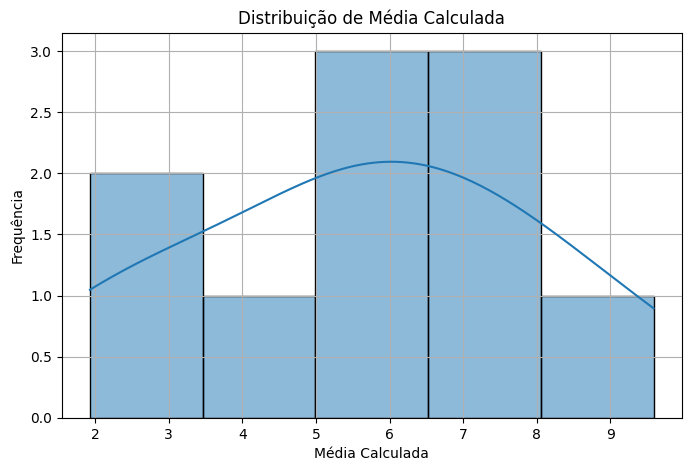

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'media_calculated'
plt.figure(figsize=(8, 5))
sns.histplot(df['media_calculated'], kde=True, bins=5)
plt.title('Distribuição de Média Calculada')
plt.xlabel('Média Calculada')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

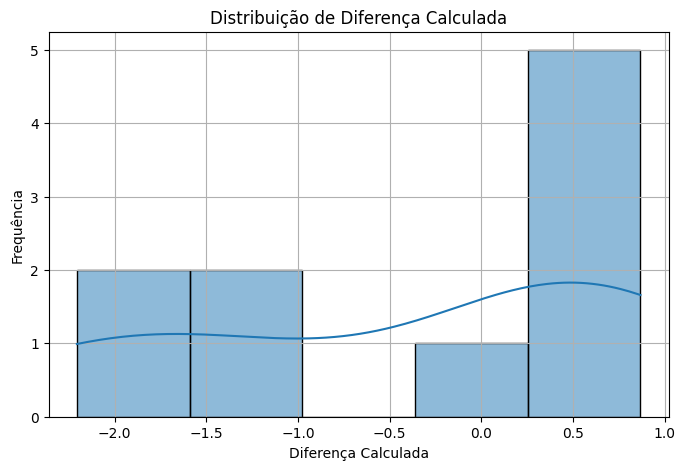

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'difference_calculated'
plt.figure(figsize=(8, 5))
sns.histplot(df['difference_calculated'], kde=True, bins=5)
plt.title('Distribuição de Diferença Calculada')
plt.xlabel('Diferença Calculada')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [20]:
import plotly.express as px
import pandas as pd

# Certifique-se de que o DataFrame 'df' com 'p1', 'p2' e 'media' esteja disponível.
# Se não estiver, execute as células anteriores para gerar esses dados.

fig = px.scatter_3d(df, x='p1', y='p2', z='media',
                    color='media', # Colore os pontos pela média calculada
                    title='Gráfico 3D Interativo: p1 vs p2 vs Média Calculada',
                    labels={'p1': 'Nota P1', 'p2': 'Nota P2', 'media': 'Média Calculada'})

fig.update_layout(scene = dict(
                    xaxis_title='Nota P1',
                    yaxis_title='Nota P2',
                    zaxis_title='Média Calculada'))

fig.show()

### Análise do Gráfico 3D Interativo: p1 vs p2 vs Média Calculada

Este gráfico de dispersão 3D interativo permite visualizar a relação entre as notas `p1` e `p2` e a `média calculada` em um espaço tridimensional.

*   **Eixos**: Cada eixo representa uma das variáveis: `p1`, `p2` e `media_calculated`.
*   **Interatividade**: Você pode girar o gráfico, aplicar zoom e passar o mouse sobre os pontos para ver os valores exatos, o que ajuda a entender melhor a estrutura dos dados.
*   **Cor**: Os pontos são coloridos com base no valor da `media_calculated`, permitindo observar padrões visuais onde os pontos mais claros ou mais escuros correspondem a diferentes faixas de média.

**Observações Visuais Esperadas:**

1.  **Plano da Média**: Você deve notar que os pontos tendem a se agrupar em torno de um plano. Isso ocorre porque a `média` é uma combinação linear de `p1` e `p2` (média = 0.5 * p1 + 0.5 * p2). Visualmente, isso significa que a média está intrinsecamente ligada aos valores de `p1` e `p2`.
2.  **Relação Original**: A forte correlação entre `p1` e `p2` ainda será perceptível no plano XY (se você olhar o gráfico de cima). Os pontos se estenderão ao longo de uma diagonal, como no gráfico 2D original.

Este tipo de visualização é excelente para entender como uma variável transformada se relaciona com suas variáveis originais, especialmente quando a transformação é linear, como a média.

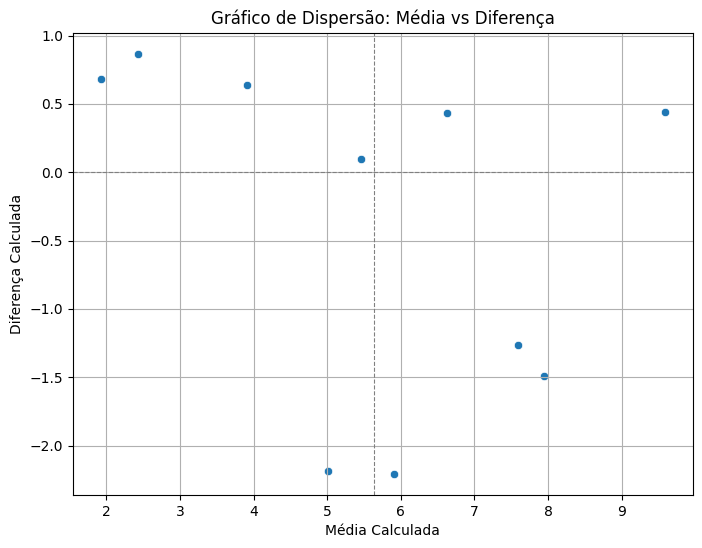

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o gráfico de dispersão para 'media' vs 'diferenca'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['media'], y=df['diferenca'])
plt.title('Gráfico de Dispersão: Média vs Diferença')
plt.xlabel('Média Calculada')
plt.ylabel('Diferença Calculada')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Linha de referência na diferença zero
plt.axvline(df['media'].mean(), color='gray', linestyle='--', linewidth=0.8) # Linha de referência na média da média
plt.show()

### Análise do Gráfico de Dispersão: Média vs Diferença

Este gráfico de dispersão mostra a relação entre a média das notas (`p1` + `p2` / 2) e a diferença entre elas (`p1` - `p2`).

*   **Eixo X (Média Calculada)**: Representa o nível geral de desempenho do aluno.
*   **Eixo Y (Diferença Calculada)**: Indica o quão consistente ou inconsistente foi o desempenho do aluno entre as duas provas.

**Observações Visuais Esperadas:**

1.  **Baixa Correlação**: Você deve notar que os pontos estão espalhados pelo gráfico sem uma tendência linear clara (nem ascendente, nem descendente). Isso visualmente confirma a **baixa correlação** entre a média e a diferença, que já foi calculada como próxima de zero.
2.  **Distribuição**: Os pontos de 'diferença' tendem a se agrupar em torno de zero no eixo Y, indicando que, na maioria dos casos, as notas de `p1` e `p2` não são extremamente diferentes. Os pontos de 'média' se distribuirão ao longo do eixo X, refletindo a variação no desempenho geral dos alunos.

Este gráfico é uma representação visual clara de como a transformação linear conseguiu **descorrelacionar** as informações originais, separando o componente de nível (média) do componente de variação (diferença).

# Conclusão

- **p1 e p2** apresentam alta correlação, pois p2 foi construída a partir de p1 com pequeno ruído.  
- Após a transformação linear, **média** e **diferença** tornam-se praticamente **não correlacionadas**.  
- Isso mostra como transformações lineares podem **reduzir correlações** e separar informações independentes.  
- A transformação usando **soma e diferença** também separa nível geral (soma) e variação interna (diferença).  
